In [1]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/competitions/data-science-5-sbu/data?select=train.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kunalsharma2134
Your Kaggle Key: ··········


100%|██████████| 48.2M/48.2M [00:00<00:00, 1.14GB/s]


Extracting archive ./data-science-5-sbu/data-science-5-sbu.zip to ./data-science-5-sbu


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("/content/data-science-5-sbu/train.csv")
test = pd.read_csv("/content/data-science-5-sbu/x_test.csv")
sample_sub = pd.read_csv("/content/data-science-5-sbu/sample_submission.csv")

In [3]:
train.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,NaN,Secondary,NaN,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,NaN,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.0,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0
2,2,52.0,Man,80793.0,Spouse,2.0,Doctorate,Jobless,27.539608,Exurban,...,2.0,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence,151.0
3,3,33.0,Man,30663.0,Unmarried,1.0,Undergraduate,Freelancer,24.355045,Countryside,...,1.0,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence,588.0
4,4,34.0,Man,59638.0,Spouse,0.0,Undergraduate,NaN,33.394840,Countryside,...,1.0,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence,662.0


In [4]:
train.shape

(1100000, 21)

In [5]:
train.columns

Index(['ID', 'Years Lived', 'Sex', 'Yearly Earnings', 'Relationship Status',
       'Dependent Count', 'Academic Standing', 'Job Title', 'Wellness Index',
       'Region', 'Coverage Class', 'Prior Claims', 'Automobile Age',
       'Financial Rating', 'Coverage Period', 'Coverage Commencement',
       'Client Review', 'Tobacco Use', 'Physical Activity', 'Asset Category',
       'Policy Cost'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1100000 non-null  int64  
 1   Years Lived            1082781 non-null  float64
 2   Sex                    1100000 non-null  object 
 3   Yearly Earnings        1058849 non-null  float64
 4   Relationship Status    1083018 non-null  object 
 5   Dependent Count        999297 non-null   float64
 6   Academic Standing      1100000 non-null  object 
 7   Job Title              771458 non-null   object 
 8   Wellness Index         1031954 non-null  float64
 9   Region                 1100000 non-null  object 
 10  Coverage Class         1100000 non-null  object 
 11  Prior Claims           766140 non-null   float64
 12  Automobile Age         1099994 non-null  float64
 13  Financial Rating       973595 non-null   float64
 14  Coverage Period   

In [7]:
train.isna().sum()

,0
ID,0
Years Lived,17219
Sex,0
Yearly Earnings,41151
Relationship Status,16982
Dependent Count,100703
Academic Standing,0
Job Title,328542
Wellness Index,68046
Region,0


In [8]:
train.describe()

,ID,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Policy Cost
count,1.100000e+06,1.082781e+06,1.058849e+06,999297.000000,1.031954e+06,766140.000000,1.099994e+06,973595.000000,1.099999e+06,1.100000e+06
mean,5.499995e+05,4.114396e+01,3.273969e+04,2.009234,2.561357e+01,1.003279,9.573080e+00,593.003554,5.016976e+00,1.102681e+03
std,3.175428e+05,1.353912e+01,3.218211e+04,1.417255,1.220411e+01,0.983413,5.776708e+00,149.951723,2.594547e+00,8.650824e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000,2.012237e+00,0.000000,0.000000e+00,300.000000,1.000000e+00,2.000000e+01
25%,2.749998e+05,3.000000e+01,7.991000e+03,1.000000,1.591814e+01,0.000000,5.000000e+00,468.000000,3.000000e+00,5.140000e+02
50%,5.499995e+05,4.100000e+01,2.389700e+04,2.000000,2.458200e+01,1.000000,1.000000e+01,595.000000,5.000000e+00,8.720000e+02
75%,8.249992e+05,5.300000e+01,4.463300e+04,3.000000,3.452768e+01,2.000000,1.500000e+01,721.000000,7.000000e+00,1.509000e+03
max,1.099999e+06,6.400000e+01,1.499970e+05,4.000000,5.897591e+01,9.000000,1.900000e+01,849.000000,9.000000e+00,4.999000e+03


In [9]:
train.duplicated().sum()

np.int64(0)

In [10]:
train.head(2)

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,NaN,Secondary,NaN,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,NaN,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.0,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0


In [11]:
train.isna().sum()

,0
ID,0
Years Lived,17219
Sex,0
Yearly Earnings,41151
Relationship Status,16982
Dependent Count,100703
Academic Standing,0
Job Title,328542
Wellness Index,68046
Region,0


In [12]:
# Handle Null Values

from sklearn.impute import SimpleImputer

train_num_col = train.select_dtypes('float').columns
train_obj_col = train.select_dtypes('object').columns

test_num_col = test.select_dtypes('float').columns
test_obj_col = test.select_dtypes('object').columns

mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

train[train_num_col] = mean_imputer.fit_transform(train[train_num_col])
train[train_obj_col] = mode_imputer.fit_transform(train[train_obj_col])

test[test_num_col] = mean_imputer.fit_transform(test[test_num_col])
test[test_obj_col] = mode_imputer.fit_transform(test[test_obj_col])

In [13]:
train.head(2)

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,2.009234,Secondary,Working,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,Moderate,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.000000,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0


In [14]:
train.isna().sum()

,0
ID,0
Years Lived,0
Sex,0
Yearly Earnings,0
Relationship Status,0
Dependent Count,0
Academic Standing,0
Job Title,0
Wellness Index,0
Region,0


In [15]:
test.shape

(100000, 20)

In [16]:
test.isna().sum()

,0
ID,0
Years Lived,0
Sex,0
Yearly Earnings,0
Relationship Status,0
Dependent Count,0
Academic Standing,0
Job Title,0
Wellness Index,0
Region,0


In [17]:
train.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,2.009234,Secondary,Working,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,Moderate,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.000000,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0
2,2,52.0,Man,80793.0,Spouse,2.000000,Doctorate,Jobless,27.539608,Exurban,...,2.0,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence,151.0
3,3,33.0,Man,30663.0,Unmarried,1.000000,Undergraduate,Freelancer,24.355045,Countryside,...,1.0,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence,588.0
4,4,34.0,Man,59638.0,Spouse,0.000000,Undergraduate,Working,33.394840,Countryside,...,1.0,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence,662.0


In [18]:
train = train.drop('ID',axis=1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Years Lived            1100000 non-null  float64
 1   Sex                    1100000 non-null  object 
 2   Yearly Earnings        1100000 non-null  float64
 3   Relationship Status    1100000 non-null  object 
 4   Dependent Count        1100000 non-null  float64
 5   Academic Standing      1100000 non-null  object 
 6   Job Title              1100000 non-null  object 
 7   Wellness Index         1100000 non-null  float64
 8   Region                 1100000 non-null  object 
 9   Coverage Class         1100000 non-null  object 
 10  Prior Claims           1100000 non-null  float64
 11  Automobile Age         1100000 non-null  float64
 12  Financial Rating       1100000 non-null  float64
 13  Coverage Period        1100000 non-null  float64
 14  Coverage Commencem

In [20]:
# Check for Outliers

nums = train.select_dtypes(include='float64')

In [21]:
nums

,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Policy Cost
0,26.0,8071.0,2.009234,17.927378,0.000000,4.0,622.0,2.0,533.0
1,42.0,49.0,2.000000,49.828507,1.000000,15.0,568.0,6.0,4795.0
2,52.0,80793.0,2.000000,27.539608,2.000000,2.0,467.0,7.0,151.0
3,33.0,30663.0,1.000000,24.355045,1.000000,10.0,710.0,2.0,588.0
4,34.0,59638.0,0.000000,33.394840,1.000000,10.0,431.0,2.0,662.0
...,...,...,...,...,...,...,...,...,...
1099995,30.0,2789.0,4.000000,15.965779,1.003279,18.0,328.0,5.0,538.0
1099996,35.0,72512.0,2.000000,23.914243,0.000000,16.0,338.0,9.0,819.0
1099997,43.0,85463.0,0.000000,25.151808,0.000000,8.0,849.0,3.0,403.0
1099998,49.0,5908.0,0.000000,41.637977,0.000000,2.0,444.0,1.0,542.0


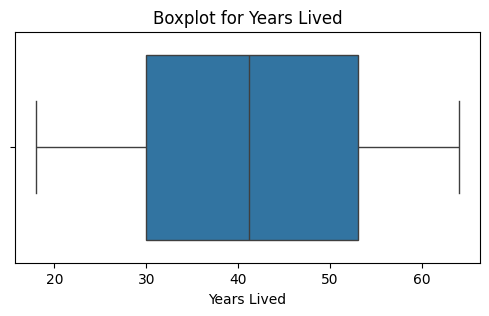

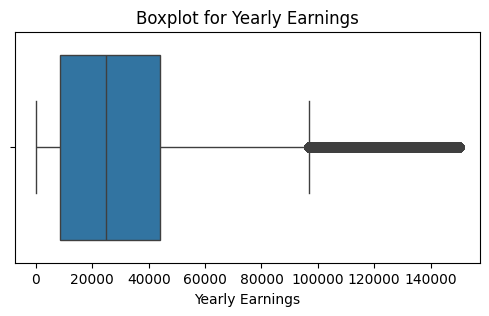

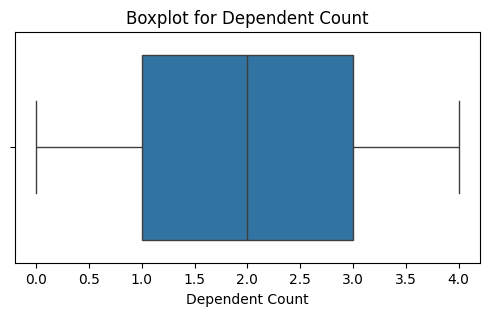

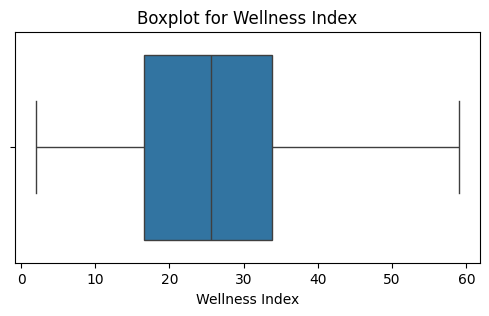

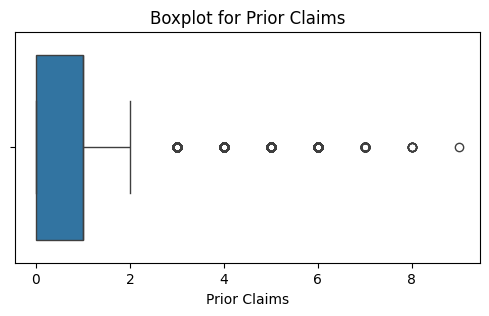

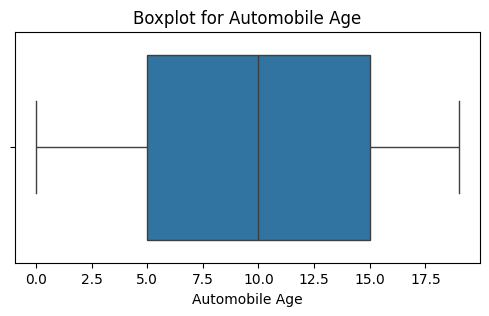

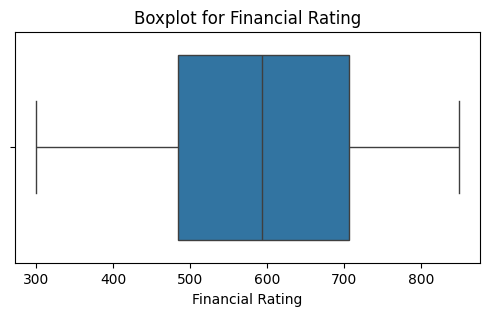

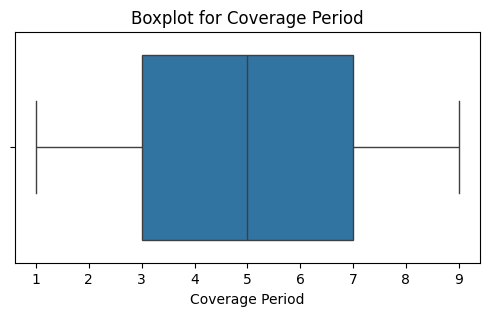

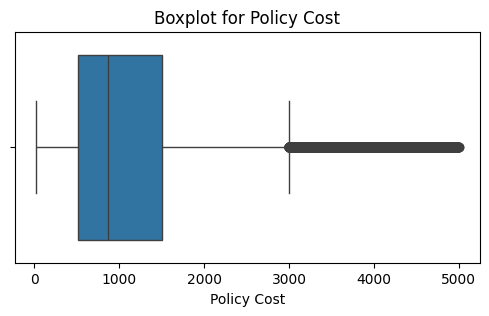

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in nums.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [28]:
train.select_dtypes(include='float64').corr()

,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Policy Cost
Years Lived,1.000000,0.000234,0.001496,0.000914,0.001657,-0.002576,0.002165,0.000210,-0.002420
Yearly Earnings,0.000234,1.000000,0.002161,0.024164,0.035262,-0.000416,-0.186516,0.000168,-0.012189
Dependent Count,0.001496,0.002161,1.000000,0.003963,-0.003438,0.000974,-0.001551,-0.000529,-0.000645
Wellness Index,0.000914,0.024164,0.003963,1.000000,0.001409,0.000754,0.010974,0.002146,0.014768
Prior Claims,0.001657,0.035262,-0.003438,0.001409,1.000000,-0.000643,0.028308,0.002696,0.039480
Automobile Age,-0.002576,-0.000416,0.000974,0.000754,-0.000643,1.000000,0.000762,0.003234,0.000242
Financial Rating,0.002165,-0.186516,-0.001551,0.010974,0.028308,0.000762,1.000000,0.000525,-0.024402
Coverage Period,0.000210,0.000168,-0.000529,0.002146,0.002696,0.003234,0.000525,1.000000,-0.000273
Policy Cost,-0.002420,-0.012189,-0.000645,0.014768,0.039480,0.000242,-0.024402,-0.000273,1.000000


In [33]:
corr = train.select_dtypes(include='float64').corr()
print(corr['Policy Cost'].sort_values(ascending=False))


Policy Cost         1.000000
Prior Claims        0.039480
Wellness Index      0.014768
Automobile Age      0.000242
Coverage Period    -0.000273
Dependent Count    -0.000645
Years Lived        -0.002420
Yearly Earnings    -0.012189
Financial Rating   -0.024402
Name: Policy Cost, dtype: float64


In [34]:
train.head()

,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,Coverage Class,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,26.0,Man,8071.0,Unmarried,2.009234,Secondary,Working,17.927378,City,Standard,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,Moderate,Smoker,Everyday,Residence,533.0
1,42.0,Man,49.0,Unmarried,2.000000,Undergraduate,Jobless,49.828507,City,Standard,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0
2,52.0,Man,80793.0,Spouse,2.000000,Doctorate,Jobless,27.539608,Exurban,Full,2.0,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence,151.0
3,33.0,Man,30663.0,Unmarried,1.000000,Undergraduate,Freelancer,24.355045,Countryside,Standard,1.0,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence,588.0
4,34.0,Man,59638.0,Spouse,0.000000,Undergraduate,Working,33.394840,Countryside,Superior,1.0,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence,662.0


In [35]:
X = train.drop('Policy Cost',axis=1)
y = train['Policy Cost']

In [36]:
X

,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,Coverage Class,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category
0,26.0,Man,8071.0,Unmarried,2.009234,Secondary,Working,17.927378,City,Standard,0.000000,4.0,622.0,2.0,2024-06-10 15:21:39.261856,Moderate,Smoker,Everyday,Residence
1,42.0,Man,49.0,Unmarried,2.000000,Undergraduate,Jobless,49.828507,City,Standard,1.000000,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit
2,52.0,Man,80793.0,Spouse,2.000000,Doctorate,Jobless,27.539608,Exurban,Full,2.000000,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence
3,33.0,Man,30663.0,Unmarried,1.000000,Undergraduate,Freelancer,24.355045,Countryside,Standard,1.000000,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence
4,34.0,Man,59638.0,Spouse,0.000000,Undergraduate,Working,33.394840,Countryside,Superior,1.000000,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,30.0,Woman,2789.0,Unmarried,4.000000,Secondary,Working,15.965779,Exurban,Standard,1.003279,18.0,328.0,5.0,2020-10-08 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Flat
1099996,35.0,Man,72512.0,Separated,2.000000,Undergraduate,Working,23.914243,City,Full,0.000000,16.0,338.0,9.0,2022-01-15 15:21:39.194829,Unsatisfactory,Non-Smoker,Everyday,Residence
1099997,43.0,Man,85463.0,Spouse,0.000000,Undergraduate,Working,25.151808,City,Superior,0.000000,8.0,849.0,3.0,2023-09-30 15:21:39.155231,Moderate,Smoker,Everyday,Unit
1099998,49.0,Man,5908.0,Separated,0.000000,Undergraduate,Working,41.637977,Countryside,Full,0.000000,2.0,444.0,1.0,2019-10-11 15:21:39.264504,Satisfactory,Smoker,Once a Month,Unit


In [37]:
y

,Policy Cost
0,533.0
1,4795.0
2,151.0
3,588.0
4,662.0
...,...
1099995,538.0
1099996,819.0
1099997,403.0
1099998,542.0


In [38]:
test.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,Coverage Class,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category
0,0,52.0,Woman,5538.0,Spouse,2.017609,Graduate,Working,8.093145,Countryside,Standard,0.0,18.0,497.000000,3.0,2020-02-10 15:21:39.274993,Moderate,Non-Smoker,Once a Week,Flat
1,1,60.0,Woman,39711.0,Spouse,4.000000,Undergraduate,Working,25.617606,Exurban,Full,0.0,3.0,340.000000,3.0,2020-10-16 15:21:39.097737,Unsatisfactory,Non-Smoker,Once a Week,Flat
2,2,58.0,Woman,2364.0,Spouse,2.000000,Undergraduate,Freelancer,34.452482,City,Full,2.0,19.0,592.053252,7.0,2021-01-02 15:21:39.126661,Unsatisfactory,Non-Smoker,Once a Month,Residence
3,3,39.0,Man,9094.0,Separated,0.000000,Undergraduate,Freelancer,26.241661,Countryside,Standard,1.0,17.0,761.000000,5.0,2022-05-11 15:21:39.134960,Unsatisfactory,Smoker,Seldom,Unit
4,4,47.0,Man,43189.0,Separated,2.017609,Doctorate,Freelancer,26.691921,Exurban,Full,1.0,4.0,319.000000,4.0,2020-07-28 15:21:39.181605,Unsatisfactory,Smoker,Once a Week,Flat


In [39]:
test_ids = test['ID']

In [40]:
test.drop('ID', axis=1, inplace=True)

In [41]:
train['Coverage Commencement'] = pd.to_datetime(train['Coverage Commencement'])
test['Coverage Commencement'] = pd.to_datetime(test['Coverage Commencement'])


In [42]:
train['Commencement_Year'] = train['Coverage Commencement'].dt.year
test['Commencement_Year'] = test['Coverage Commencement'].dt.year
train.drop('Coverage Commencement', axis=1, inplace=True)
test.drop('Coverage Commencement', axis=1, inplace=True)

In [43]:
X = train.drop('Policy Cost', axis=1)
y = train['Policy Cost']

In [44]:
categorical_cols = X.select_dtypes('object').columns
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

In [45]:
X

,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Commencement_Year,Sex_Man,...,Client Review_Unsatisfactory,Tobacco Use_Non-Smoker,Tobacco Use_Smoker,Physical Activity_Everyday,Physical Activity_Once a Month,Physical Activity_Once a Week,Physical Activity_Seldom,Asset Category_Flat,Asset Category_Residence,Asset Category_Unit
0,26.0,8071.0,2.009234,17.927378,0.000000,4.0,622.0,2.0,2024,True,...,False,False,True,True,False,False,False,False,True,False
1,42.0,49.0,2.000000,49.828507,1.000000,15.0,568.0,6.0,2023,True,...,False,False,True,False,False,True,False,False,False,True
2,52.0,80793.0,2.000000,27.539608,2.000000,2.0,467.0,7.0,2021,True,...,False,True,False,False,False,False,True,False,True,False
3,33.0,30663.0,1.000000,24.355045,1.000000,10.0,710.0,2.0,2023,True,...,True,True,False,False,False,False,True,False,True,False
4,34.0,59638.0,0.000000,33.394840,1.000000,10.0,431.0,2.0,2024,True,...,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,30.0,2789.0,4.000000,15.965779,1.003279,18.0,328.0,5.0,2020,False,...,False,True,False,False,False,False,True,True,False,False
1099996,35.0,72512.0,2.000000,23.914243,0.000000,16.0,338.0,9.0,2022,True,...,True,True,False,True,False,False,False,False,True,False
1099997,43.0,85463.0,0.000000,25.151808,0.000000,8.0,849.0,3.0,2023,True,...,False,False,True,True,False,False,False,False,False,True
1099998,49.0,5908.0,0.000000,41.637977,0.000000,2.0,444.0,1.0,2019,True,...,False,False,True,False,True,False,False,False,False,True


In [46]:
X, test = X.align(test, join='left', axis=1, fill_value=0)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.transform(test)

In [50]:
from xgboost import XGBRegressor

# Model define karo
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train karo
model.fit(X, y)

# Predict karo
y_pred = model.predict(test)

In [51]:


# Prepare submission
submission = pd.DataFrame({
    'ID': test_ids,
    'Policy Cost': y_pred
})

submission.to_csv('final_submission.csv', index=False)
